**Problem Statement**



The dataset gives you information about a marketing campaign of a Portuguese bank in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

**Independent Feature:**

*  Age - Age of customer
*  job - Customer Job
*  Marital- Single or Married
*  Education - Education of customer
*  Default - Has caredit card or not
*  Housing - Has housing loan or not
*  Loan - has personal loan or not
*  Contact - contact communication type (mobile or telephone) -
*  Month - last contacted month in year
*  Day_of_week - last contacted day in a week
*  Duration -How much time the campaign went
*  Campaign - no of times contacted for campaign for this customer
*  Pdays - no of days passed after the last campaign contacted
*  Previous- no of contacts performed before making current capaign
*  Poutcome - outcome of previous campaign whether it gets succed or not
*  Emp.var.rate- employment variation rate (quaterly indicator)
*  Cons.price.idx - consumer price index (monthly)
*  Cons.conf.idx -consumer confidence indwx (Monthly )
*  Euribor3m - euribor 3 months rate - daily indicator
*  Nr.employed - no of employee (quaterly indicator)

**Dependent Feature/ Target valriable:**

* Deposit - client subscribed to term deposit or not

**Importing Necessary Libraries**

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")


**Task** **1 - Data Analysis Report**

**Collecting Data & Analyze Data**

In [86]:
df= pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [87]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
df.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**Data Preprocessing and Data Cleaning**

In [89]:
df.shape # 21 columns and 41188 rows

(41188, 21)

In [90]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [91]:
df.info() # No null values and columns datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [92]:
df.dtypes.value_counts()  # 11 categorical column and 10 numerical columns

,count
object,11
int64,5
float64,5


In [93]:
df.nunique() #this many unique values each column has

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [94]:
df.isnull().sum() #no null values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [95]:
df.isna().sum() #missing Nan OR None values . No Nan values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [96]:
df.duplicated().sum() # 12 rows has duplicated value. need to remove it

np.int64(12)

In [97]:
df=df.drop_duplicates() #deleting duplicated rows

In [98]:
df.duplicated().sum() # now duplicates row got cleared

np.int64(0)

**Descriptive statistics** explain statistical information about the dataset

In [99]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Count: Number of non missing values in all columns
**Average** Customer age is 40 yrs old, most customers between 30 to 50 yrs old
**Duration** std and mean are almost equal it means some calls are very short and some are long calls.Highly skewed
**Campaign **std>mean it means some people contacted many times and some people less or no time.
**pdays** mean =962 many customer never contacted before, std= 186 some values are very small.
Previous mean 0.17 and std 0.49 most value near to 0. most never contacted
Euribor, Emp.var.rate etc are normally distributed.
age duration, campaign and previous  check skewness

In [100]:
df.rename(columns={'y':'deposit'},inplace=True)

**EDA**

In [101]:
print(df['deposit'].value_counts()) #checking Target column Balanced or not

print(df['deposit'].value_counts(normalize=True)*100) # Customer said no is 88% and yes is 11%

deposit
no     36537
yes     4639
Name: count, dtype: int64
deposit
no     88.733728
yes    11.266272
Name: proportion, dtype: float64


Target column is imbalanced classes. need to be treated using SMOTE over-sampling technique

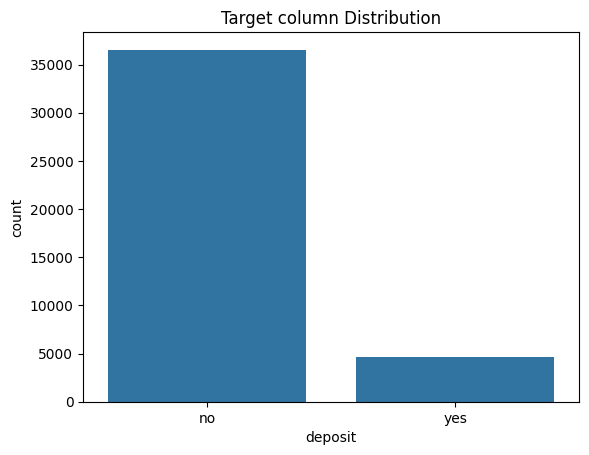

In [102]:
sns.countplot(x='deposit',data=df)
plt.title('Target column Distribution')
plt.show()

In [103]:
df['deposit']=df['deposit'].map({'no':0,'yes':1}) #by using Map function chamged no to 0 yes to 1

In [104]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**Handle Unknown Values**

In [105]:
#column has unknown values
unknown_columns= df.columns[df.isin(['unknown']).any()]
unknown_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [106]:
#Count the number of 'unknown' values in the identified columns
unknown_counts = df[['job', 'marital', 'education', 'housing', 'loan']].apply(lambda col: (col == 'unknown').sum())
print("\nCount of 'unknown' values in each column:")
print(unknown_counts)


Count of 'unknown' values in each column:
job           330
marital        80
education    1730
housing       990
loan          990
dtype: int64


In [107]:
#Replace 'unknown' with NaN in the relevant columns
df[['job', 'marital', 'education', 'housing', 'loan']] = df[['job', 'marital', 'education', 'housing', 'loan']].replace('unknown', np.nan)

In [108]:
df.isna().sum().sum()

np.int64(4120)

In [109]:
#Impute missing values with the mode (most frequent value) for categorical columns
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [110]:
# check for null values
df.isnull().sum().sum()

np.int64(0)

**Numerical Column data distribution analysis:**

In [111]:
#num_col = df.select_dtypes(include =['int64','float64'])
num_col = df.select_dtypes(exclude=['object']).drop(columns=['deposit'], errors='ignore')

In [112]:
num_col.columns  # Target column deposit removed from num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [113]:
num_col.skew() #Check for Skewness in numerical columns

,0
age,0.784560
duration,3.262808
campaign,4.762044
pdays,-4.921386
previous,3.831396
emp.var.rate,-0.724061
cons.price.idx,-0.230853
cons.conf.idx,0.302876
euribor3m,-0.709194
nr.employed,-1.044317


duration,campaign and previous +vly skewed (right skewed) and age slightly skewed,
pdays -vly left skewed and emp.var.rate slightly left skewed.

**Univariate analysis**

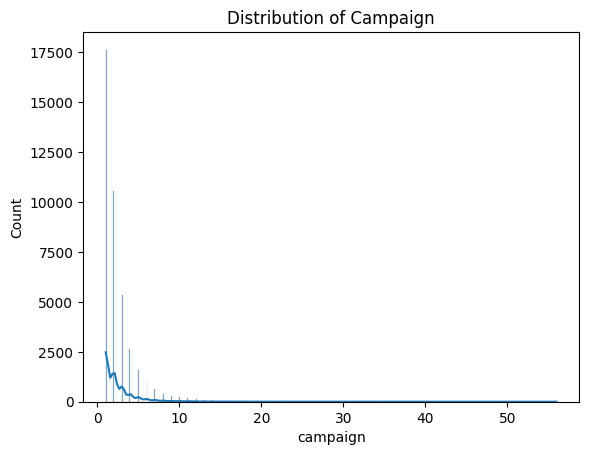

In [114]:
sns.histplot(x=df['campaign'],kde=True)
plt.title('Distribution of Campaign')
plt.show()

As per the above graph campaign is highly right skewed

Most customers were contacted very few times
a small no of customers were contacted many time

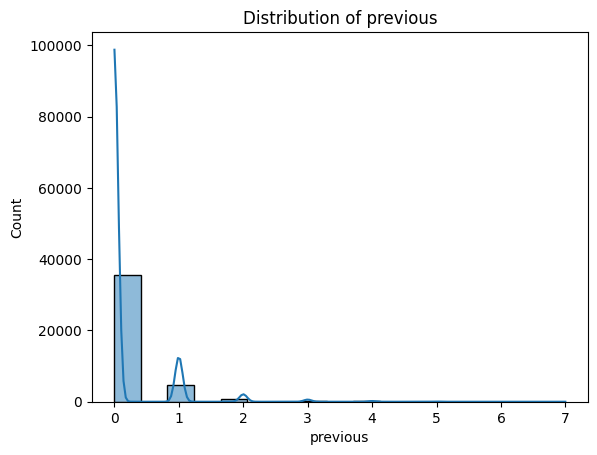

In [115]:
sns.histplot(df['previous'],kde=True)
plt.title('Distribution of previous')
plt.show()

Previous = 3.8

Highly +ve skewed
most values are 0
Very few customers were contacted before multiple times
Most clients not contacted previously

In [116]:
#log transformation for Campaign and previous column
df['campaign_log']= np.log1p(df['campaign'])
df['previous_log']= np.log1p(df['previous'])

Performed log transformation for campaign and previous are highly skewed. Gap between values after log transform values are compressed and makes data closer to gaussian.

In [117]:
print(df['campaign_log'].skew())  #after log transformation value got reduced
print(df['previous_log'].skew())

1.3502653832482818
2.5865105618409516


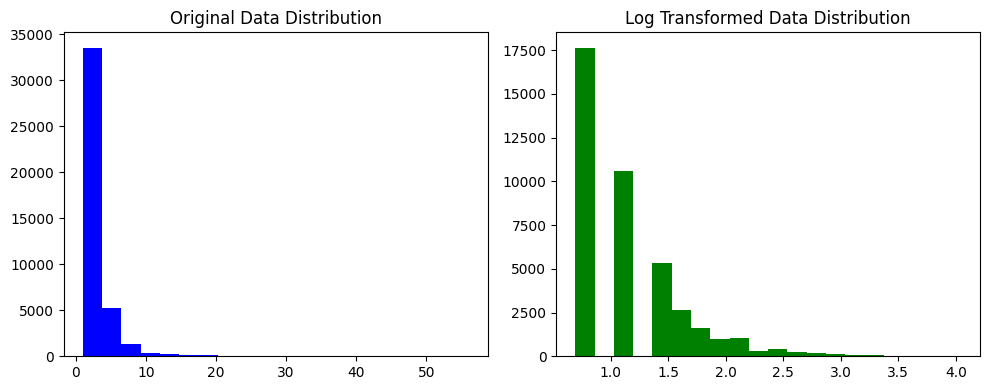

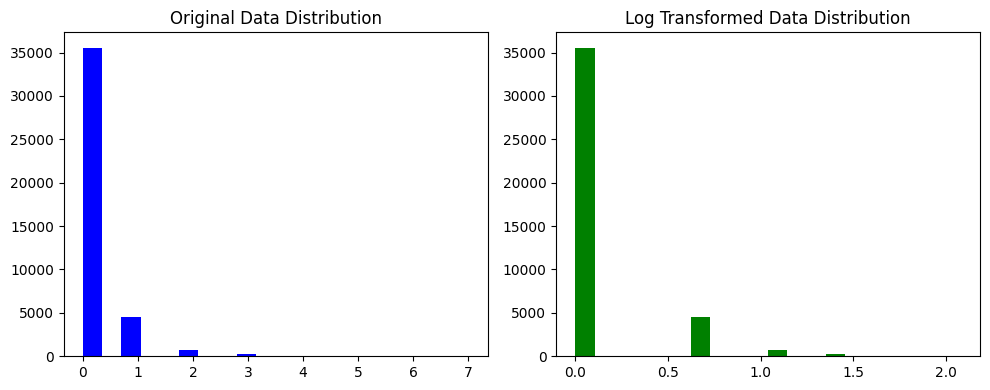

In [118]:
# 1. Visual Comparison (Histograms)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['campaign'],bins=20, color='blue')
axes[0].set_title('Original Data Distribution')
axes[1].hist(df['campaign_log'],bins=20, color='green')
axes[1].set_title('Log Transformed Data Distribution')
plt.tight_layout()
plt.show()

# 1. Visual Comparison (Histograms)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['previous'],bins=20,color='blue')
axes[0].set_title('Original Data Distribution')
axes[1].hist(df['previous_log'],bins=20,color='green')
axes[1].set_title('Log Transformed Data Distribution')
plt.tight_layout()
plt.show()

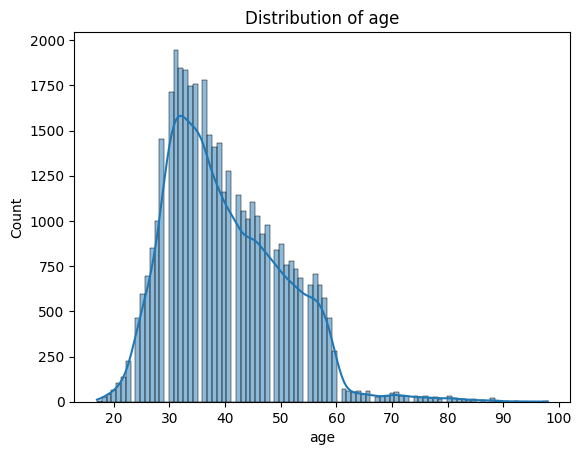

In [119]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of age')
plt.show()

Age is slightly skewed. campaign duration, previous columns are highly positive skewed. pdays are highly negative skewed.

pdays = highly negative skewed here u need to understand this column no of days since the customer was last contacted in a previous capmpaign. 999 -> customer was not previously contacted Most numners are 999 very few are actual numbers

In [120]:
df['pdays'].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


Box-Cox Transformation for pdays column

In [121]:
df['pdays_transform']= df['pdays'].apply(lambda x:0 if x==999 else 1) #Box-Cox transformation
#this converts it to 0 or 1

In [122]:
df['pdays_transform'].value_counts()

,count
pdays_transform,
0,39661
1,1515


In [123]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,campaign_log,previous_log,pdays_transform
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0


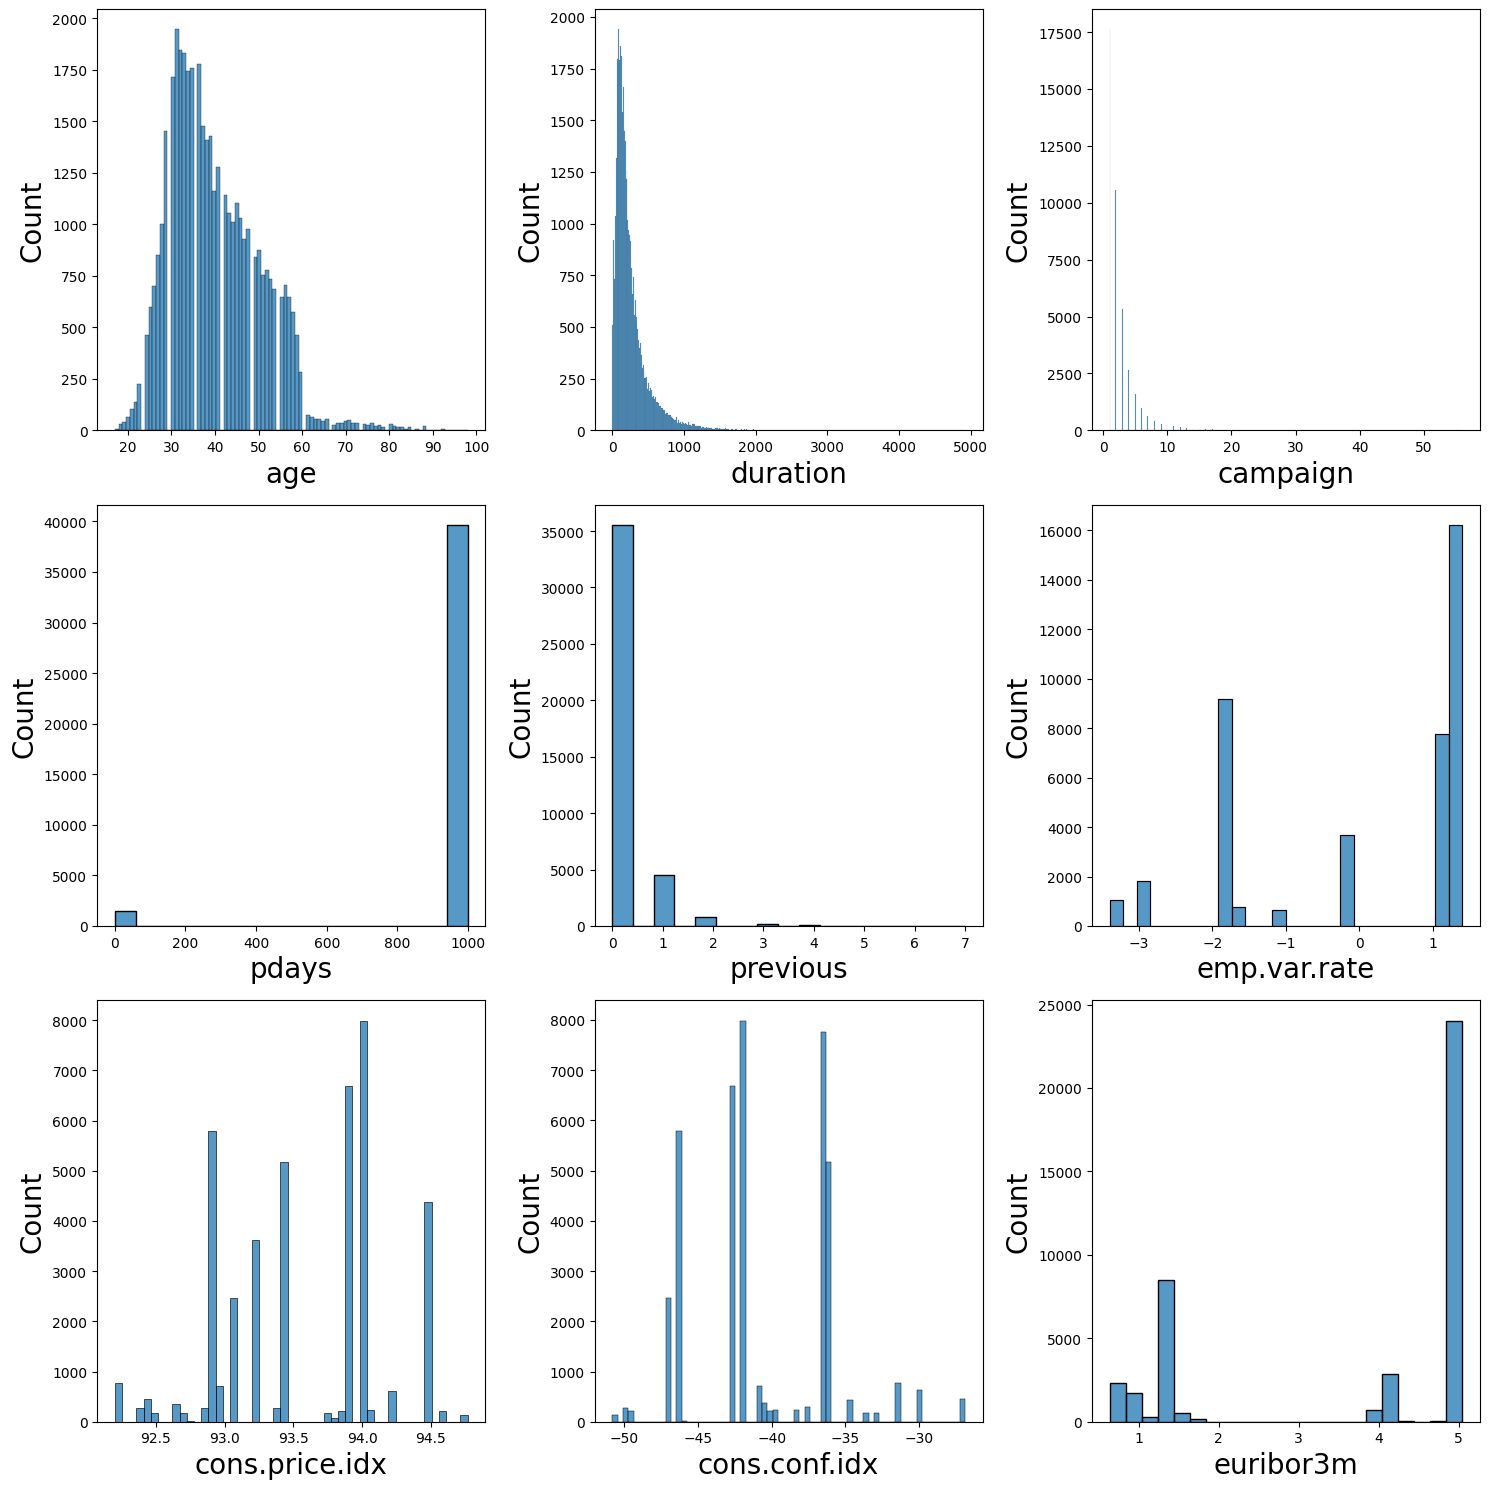

In [124]:
#Histogram for checking data distribution for numerical columns

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Finding Outliers using Boxplot

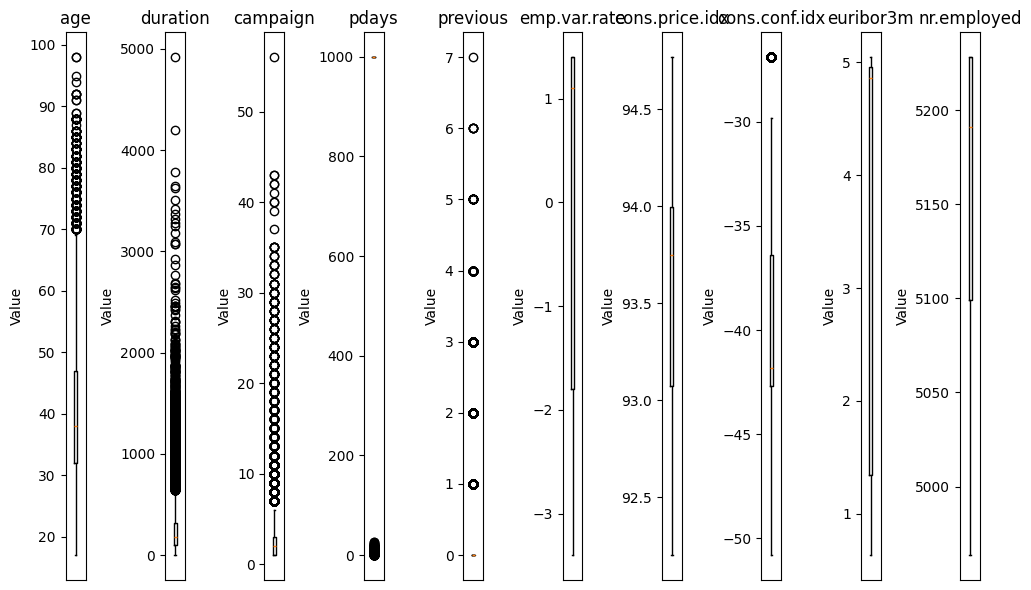

In [125]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 6))

# Loop through columns and axes to plot
for i, col in enumerate(num_col):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_xticks([]) # Hide x-axis ticks for clarity
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()



Columns with outliers based on Boxplot: 'age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx' use IQR Technique to reduce the outliers

In [126]:
def cap_outliers(df,columns):
   Q1 = df[columns].quantile(0.25)
   Q3 = df[columns].quantile(0.75)
   IQR = Q3-Q1
   lower = Q1 -1.5*IQR
   upper = Q3+ 1.5*IQR
   df[columns] = df[columns].clip(lower,upper)
   return df

for col in num_col:
    df = cap_outliers(df,col)

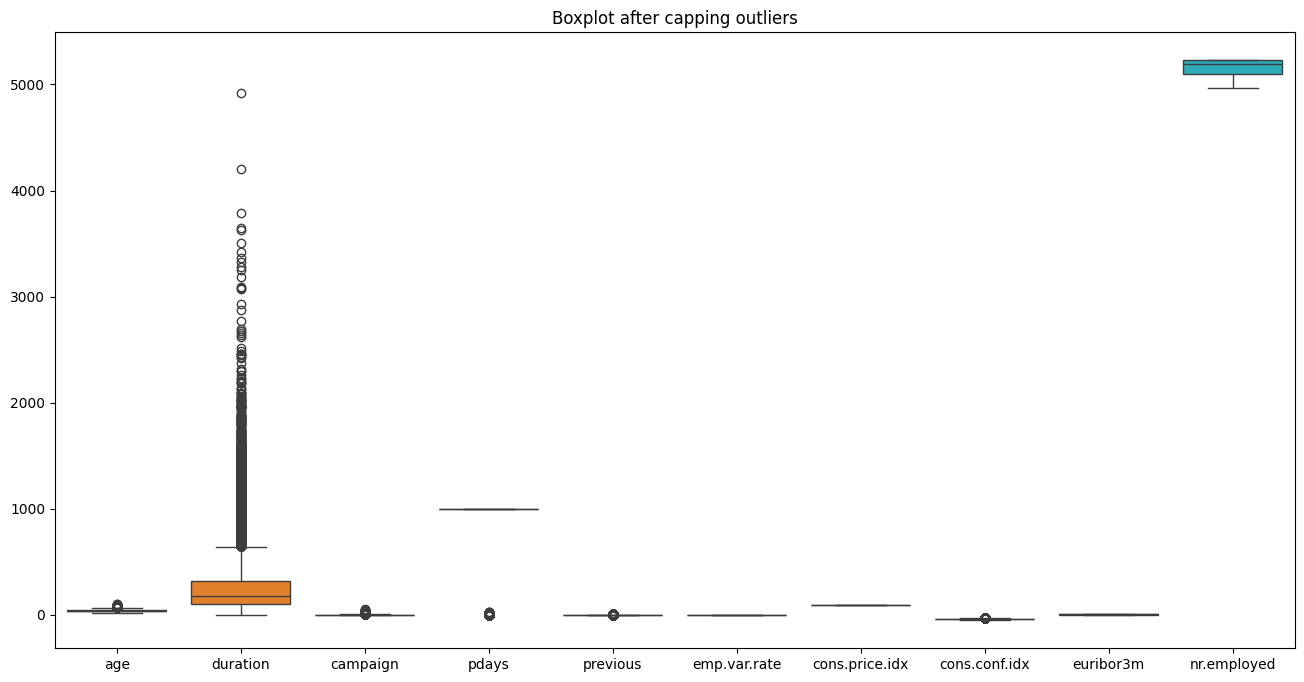

In [127]:
plt.figure(figsize =(16,8))
sns.boxplot(data=num_col)
plt.title("Boxplot after capping outliers")
plt.show()

**Checking Correlation between Features**

In [128]:
corr_matrix= num_col.corr() #find correlation between features
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


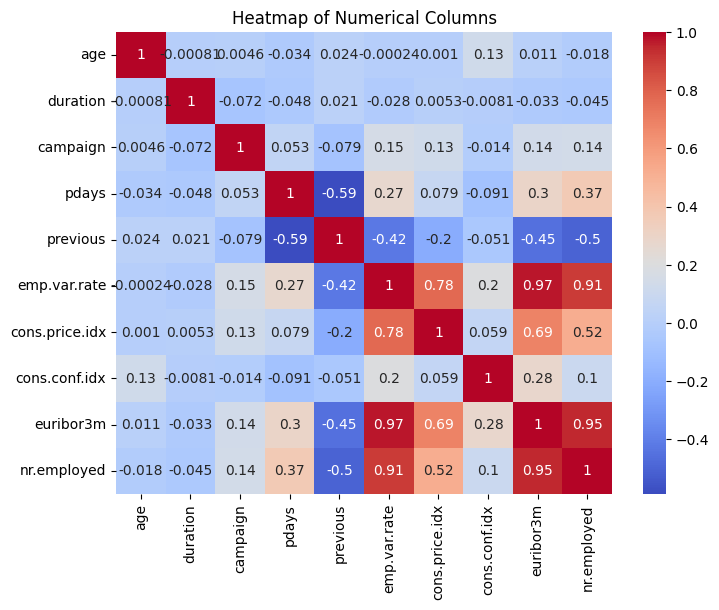

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap of Numerical Columns")
plt.show()

**Insights**
euribor3m column highly correlated to emp.var.rate and nr.employed columns
nr.employed column higly correlated with emp.var.rate and euribor3m columns
emp.var.rate column highly correlated to nr.employed and euribor3m columns , and 70% correlated to cons.price.idx column.


**So we can drop of this columns or use PCA**

In [130]:
df.drop(['euribor3m'],axis=1,inplace=True)
df.shape #col-=1

(41176, 23)

In [131]:
df.shape

(41176, 23)

In [132]:
cat_cols = df.select_dtypes(include=['object','bool','category'])

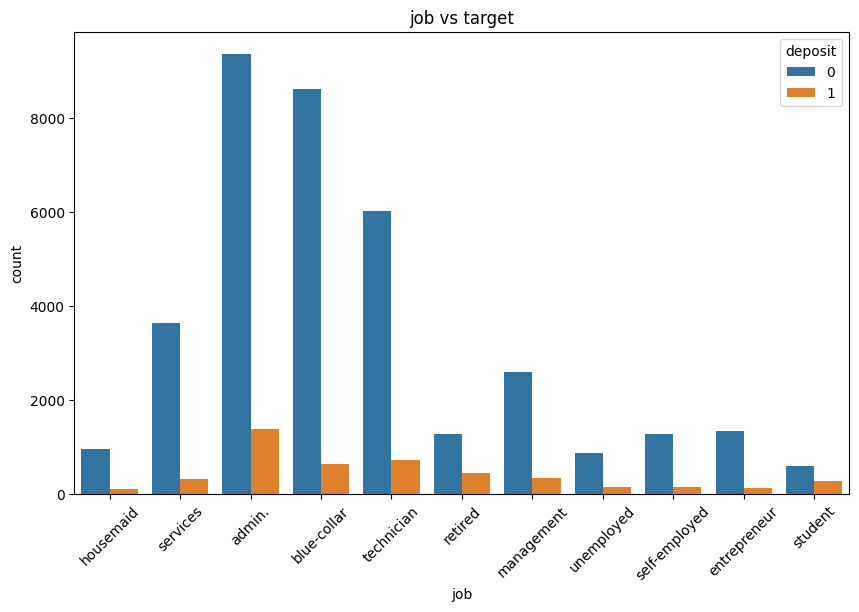

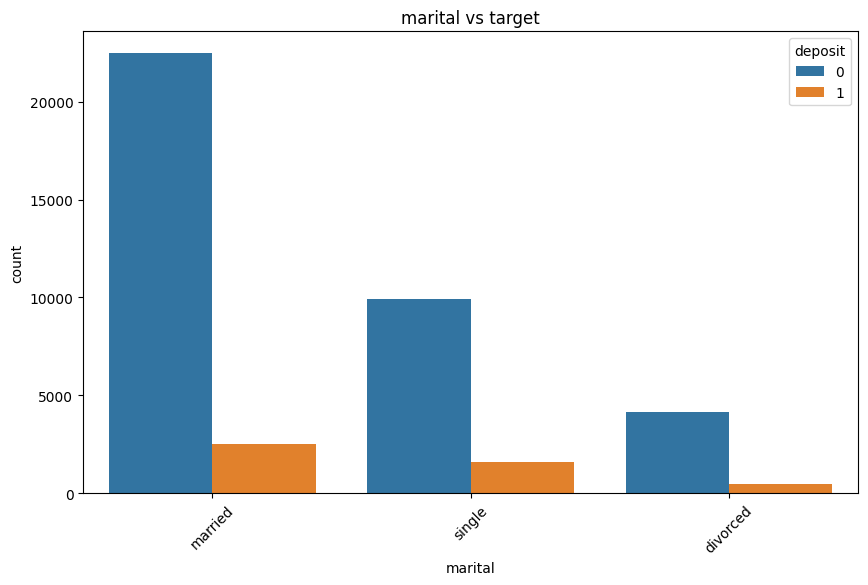

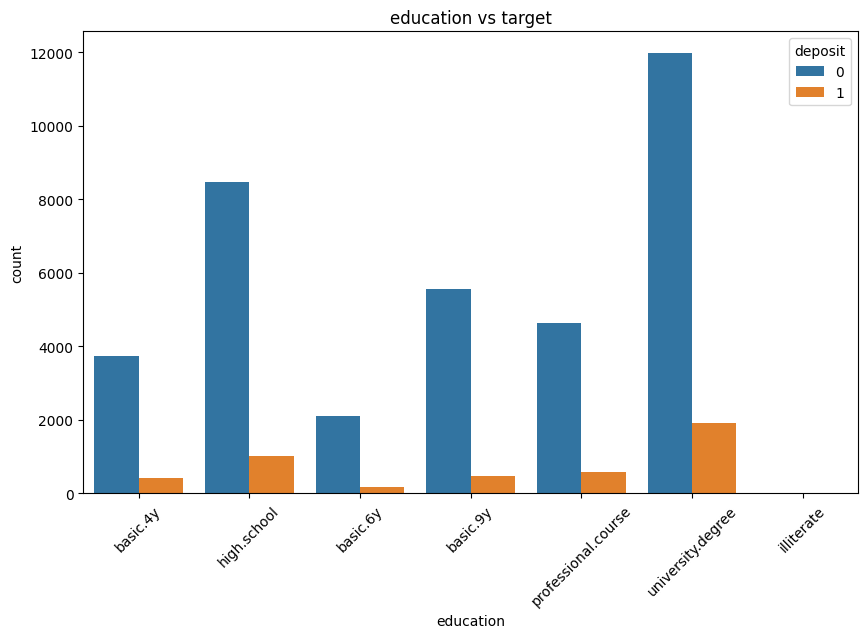

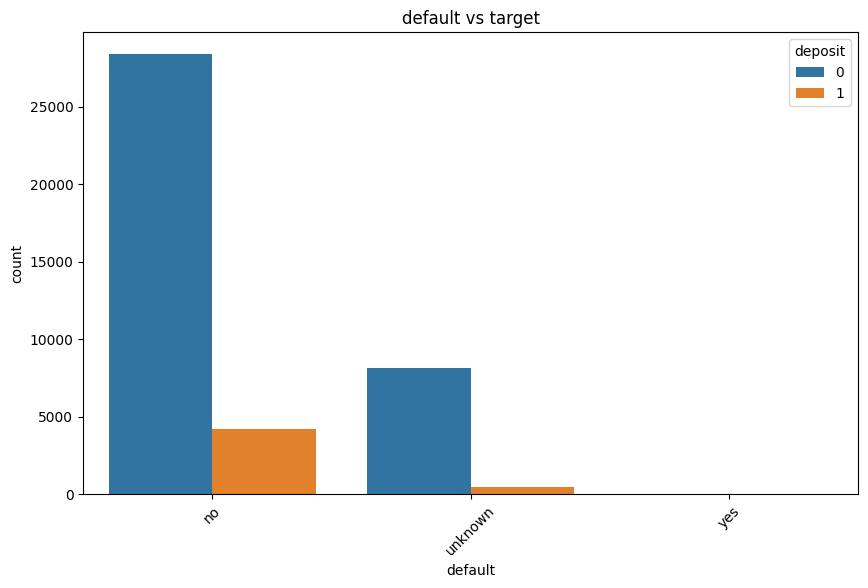

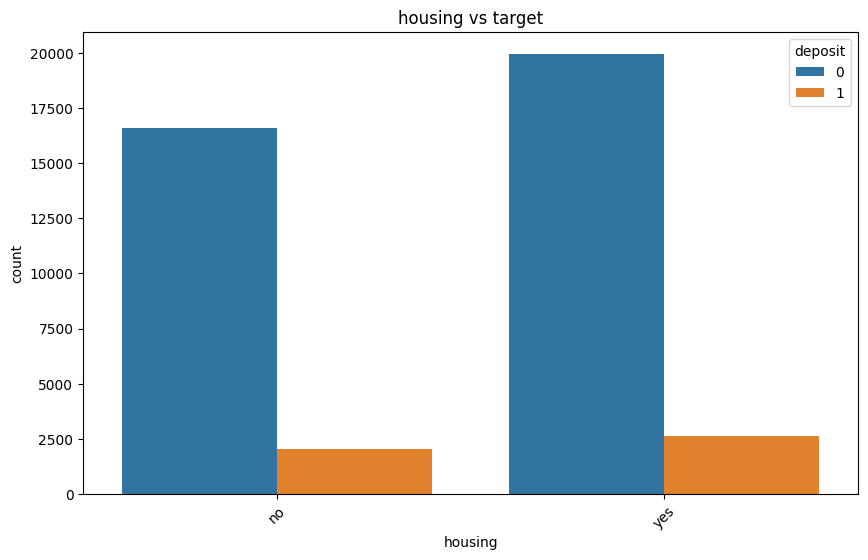

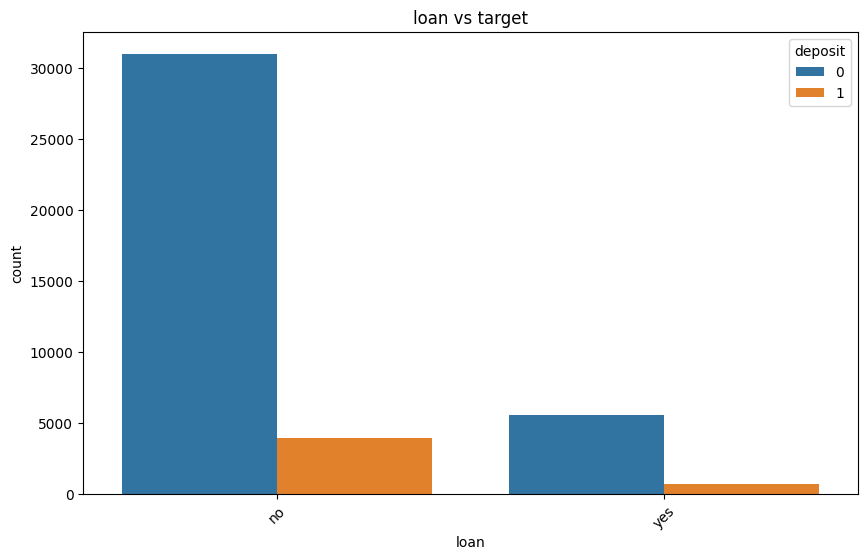

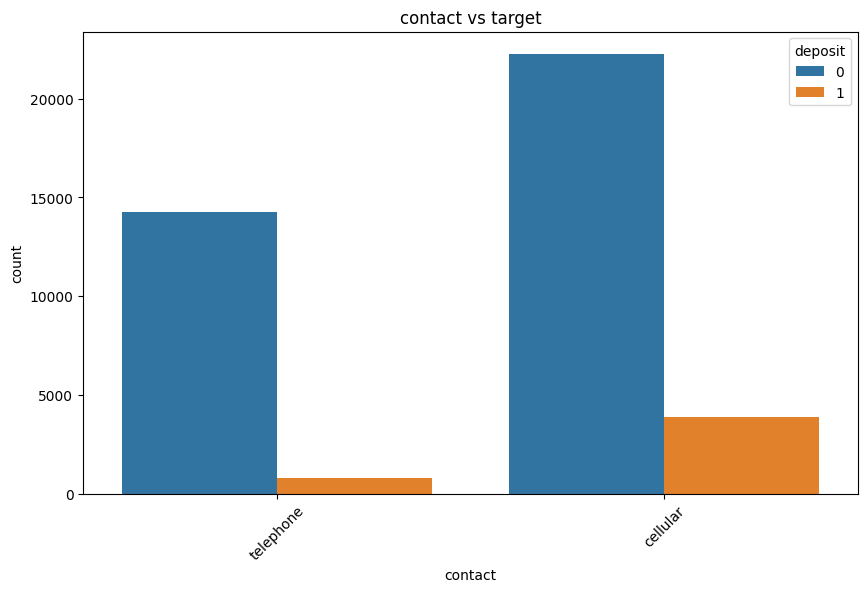

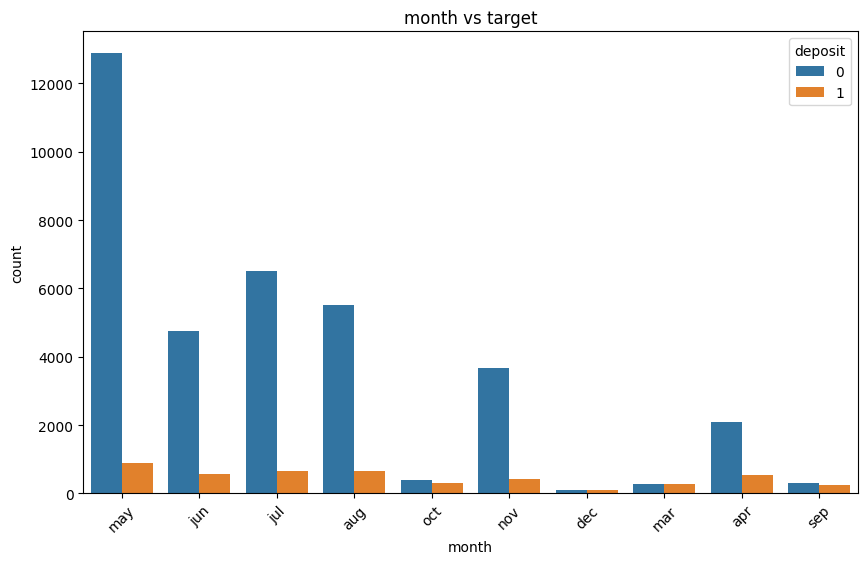

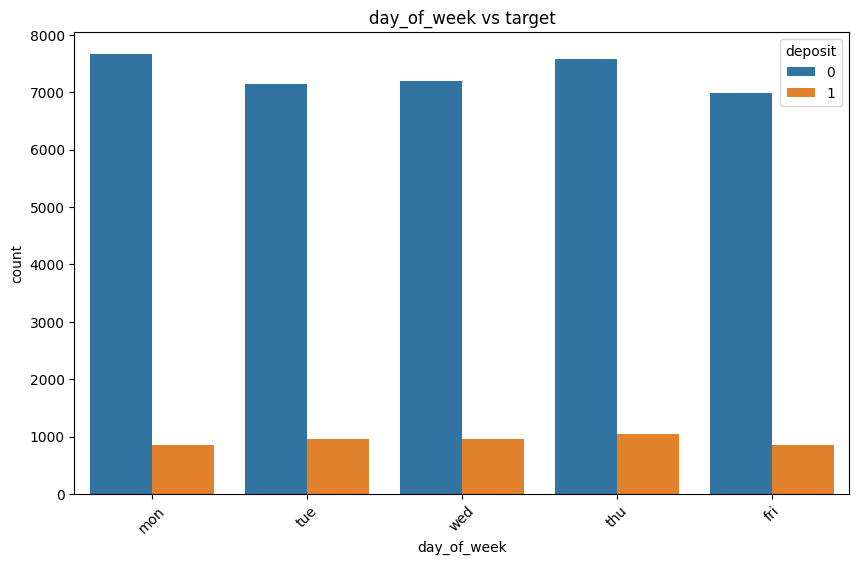

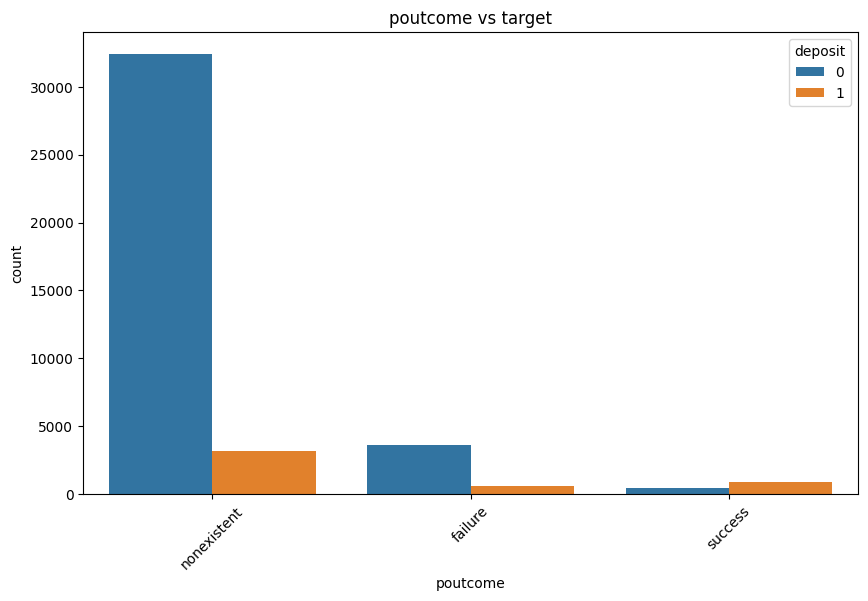

In [133]:
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[col],hue=df['deposit'])
  plt.title(f'{col} vs target')
  plt.ylabel('count')
  plt.xticks(rotation=45)
  plt.show()

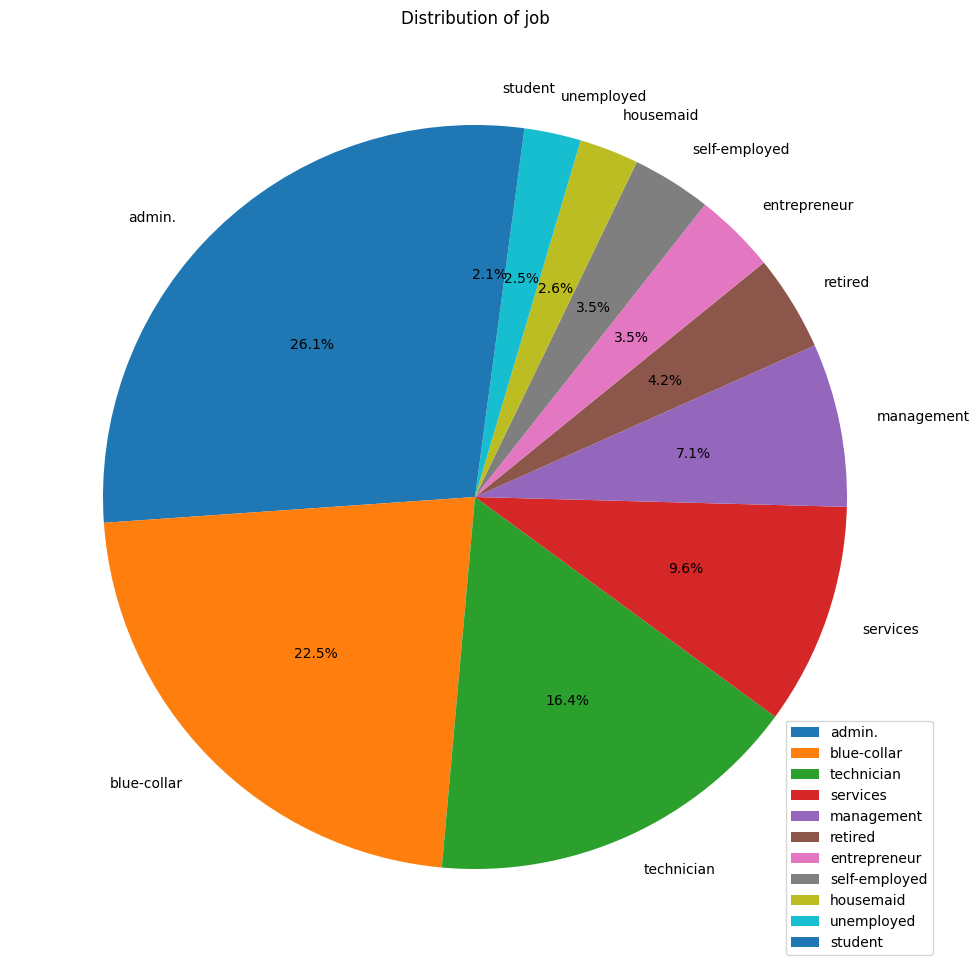

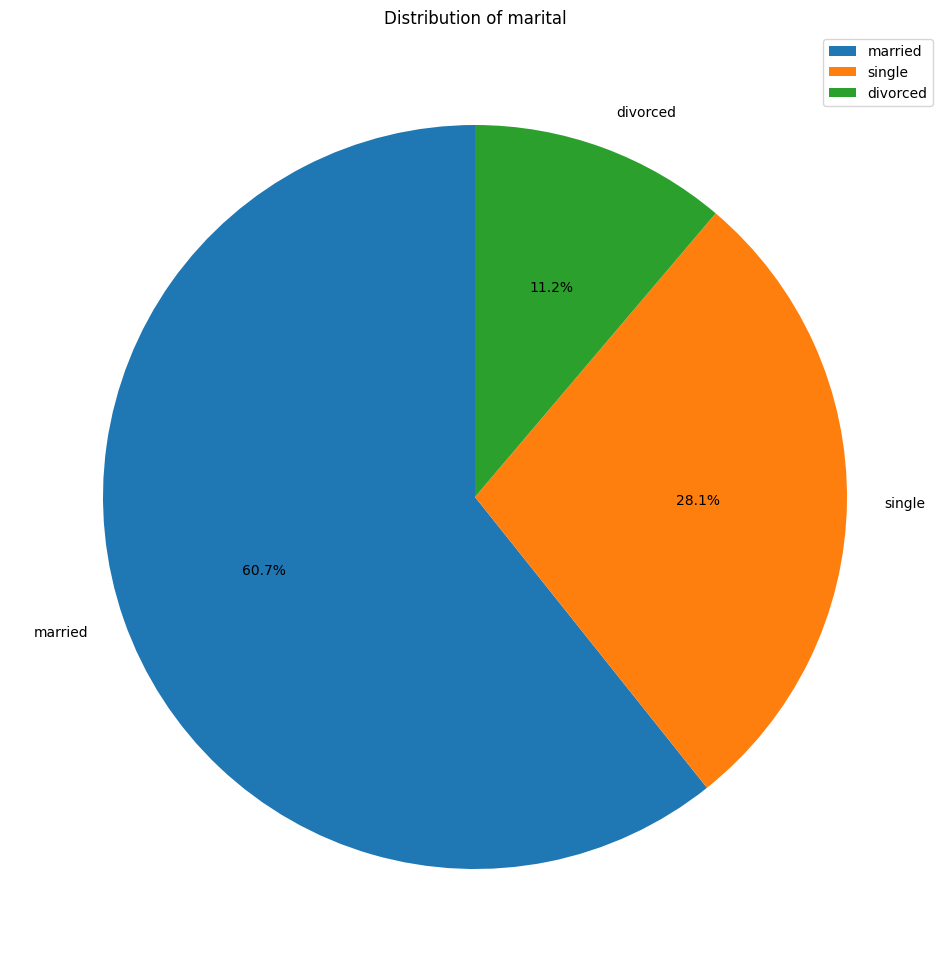

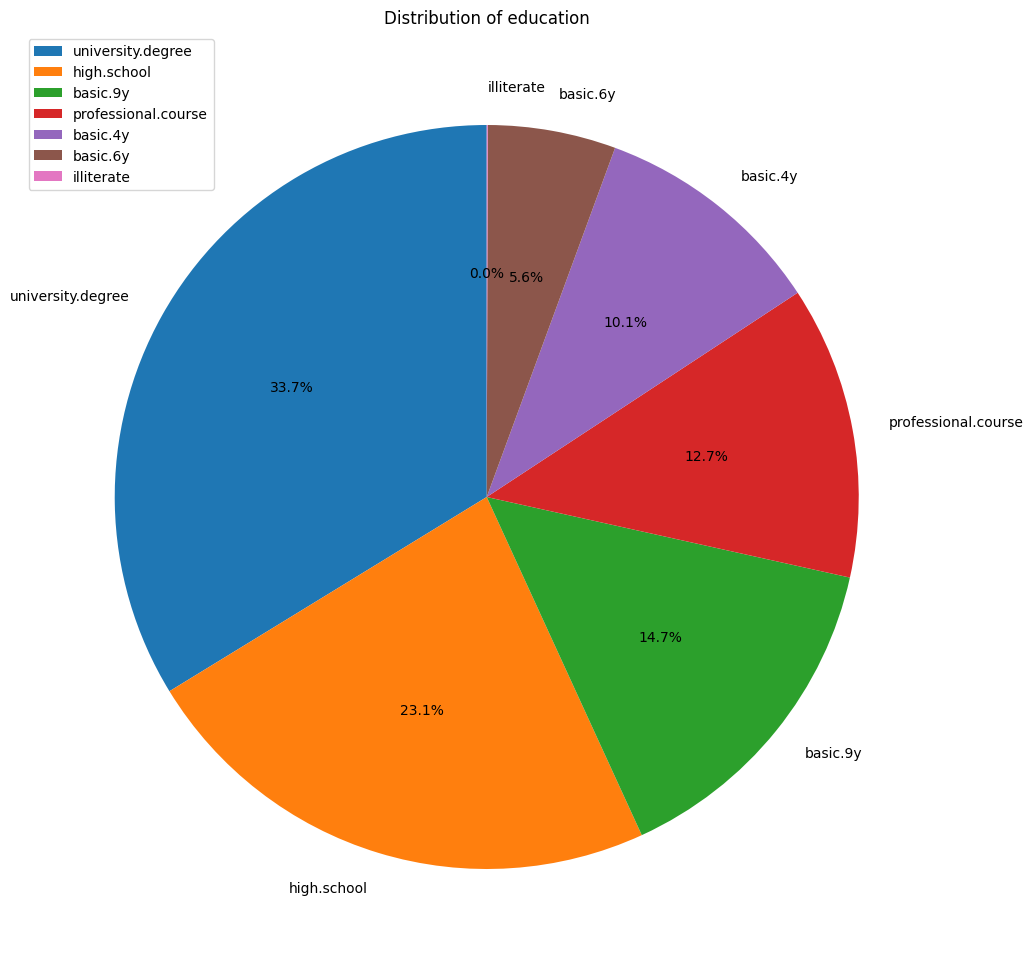

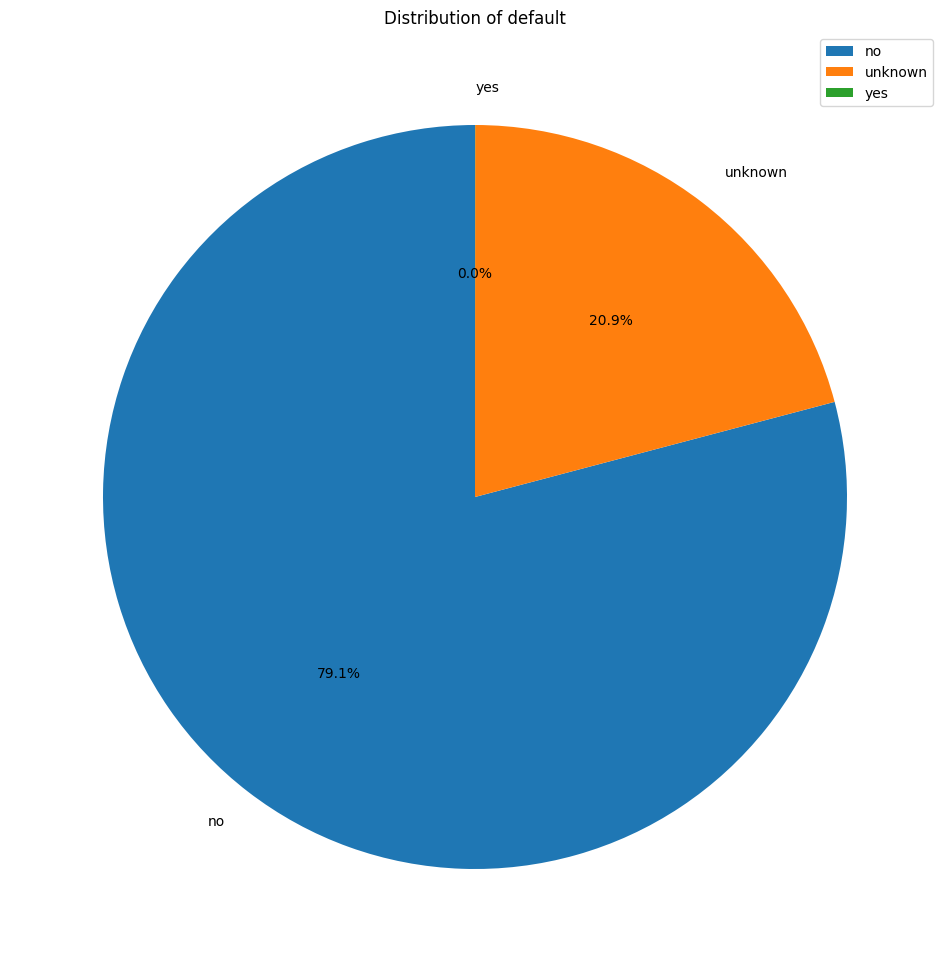

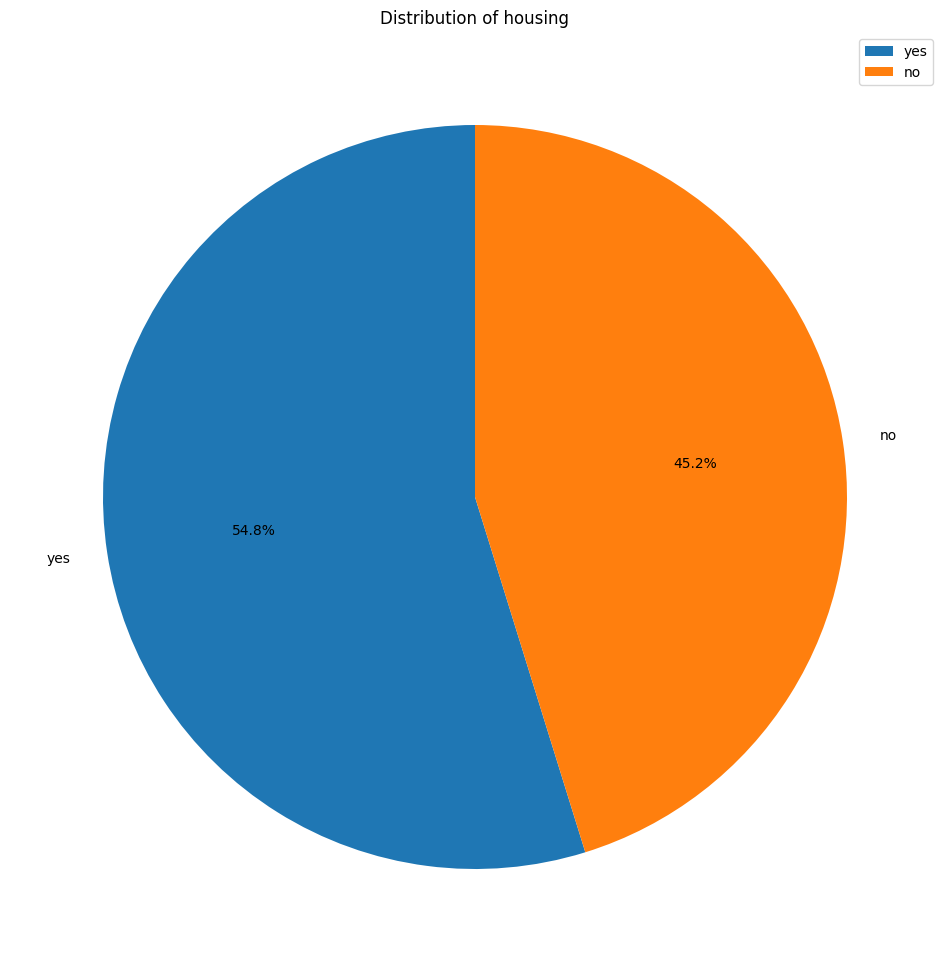

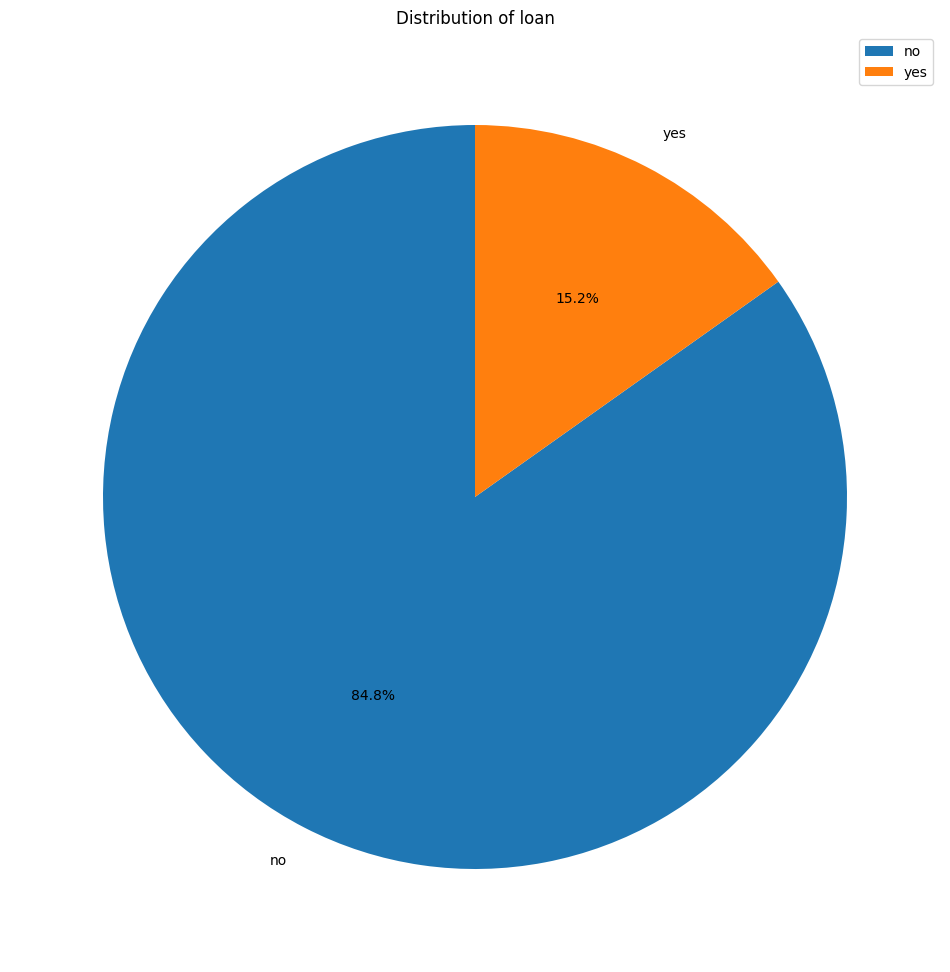

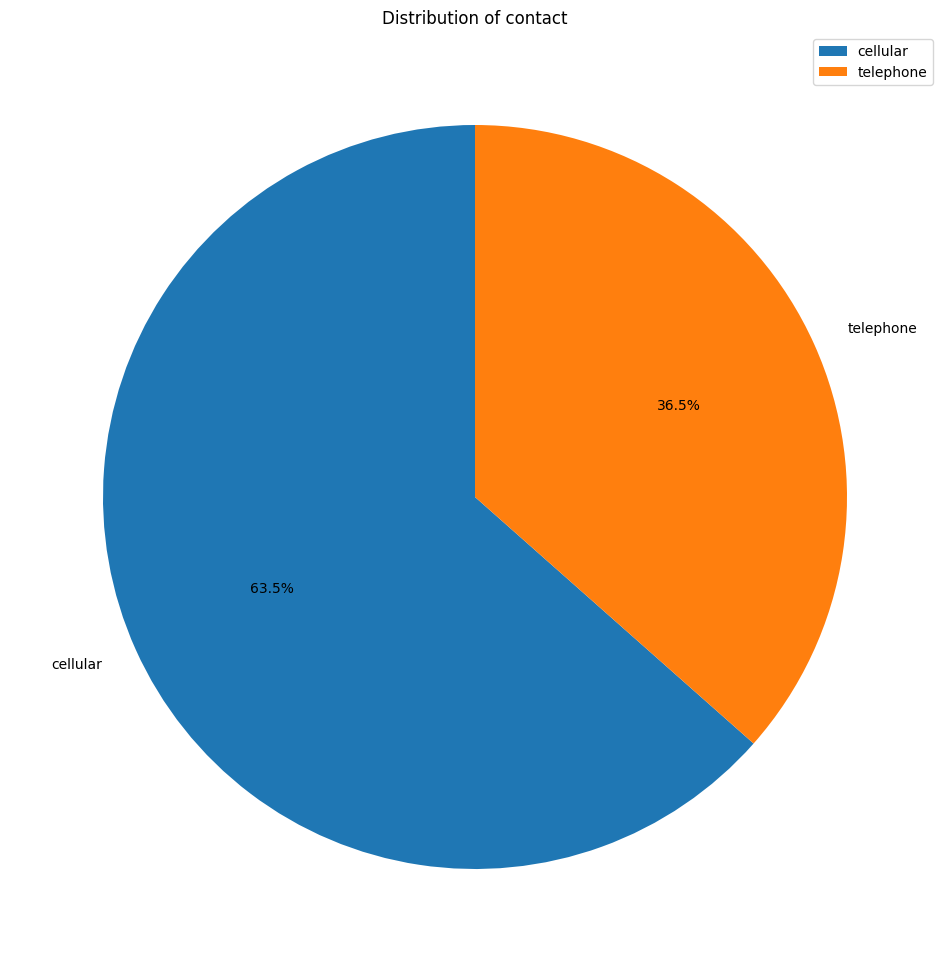

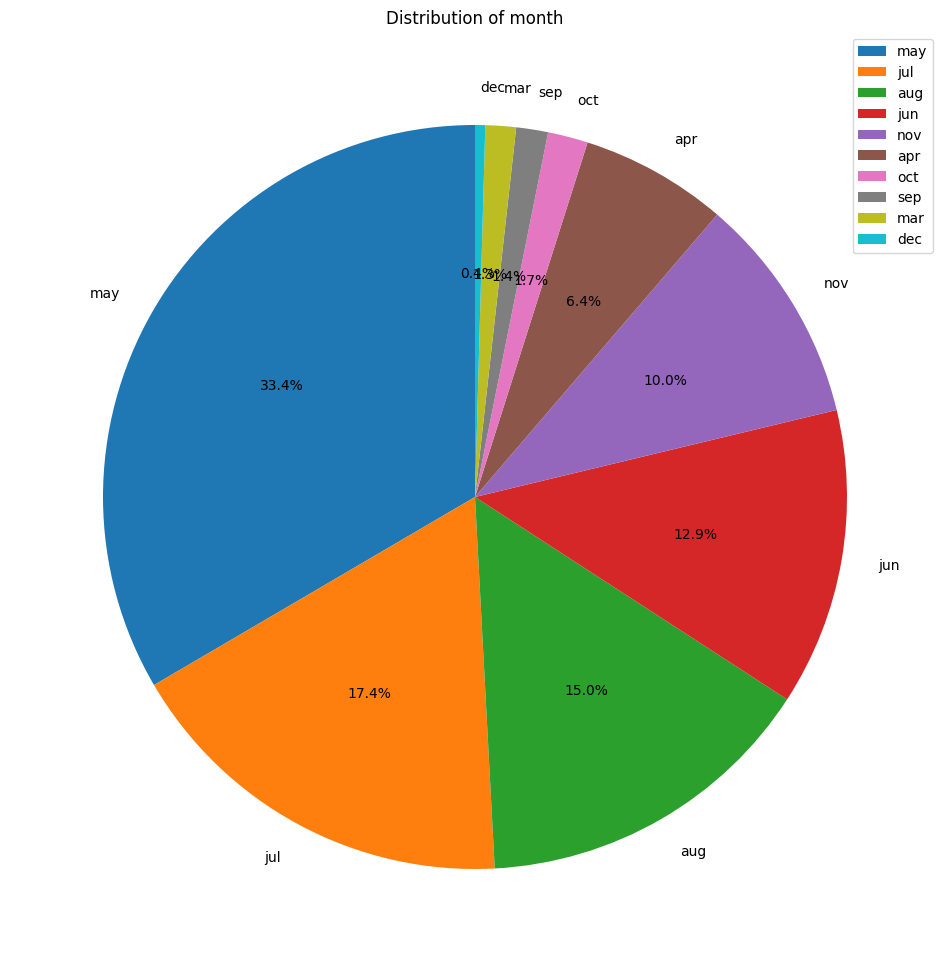

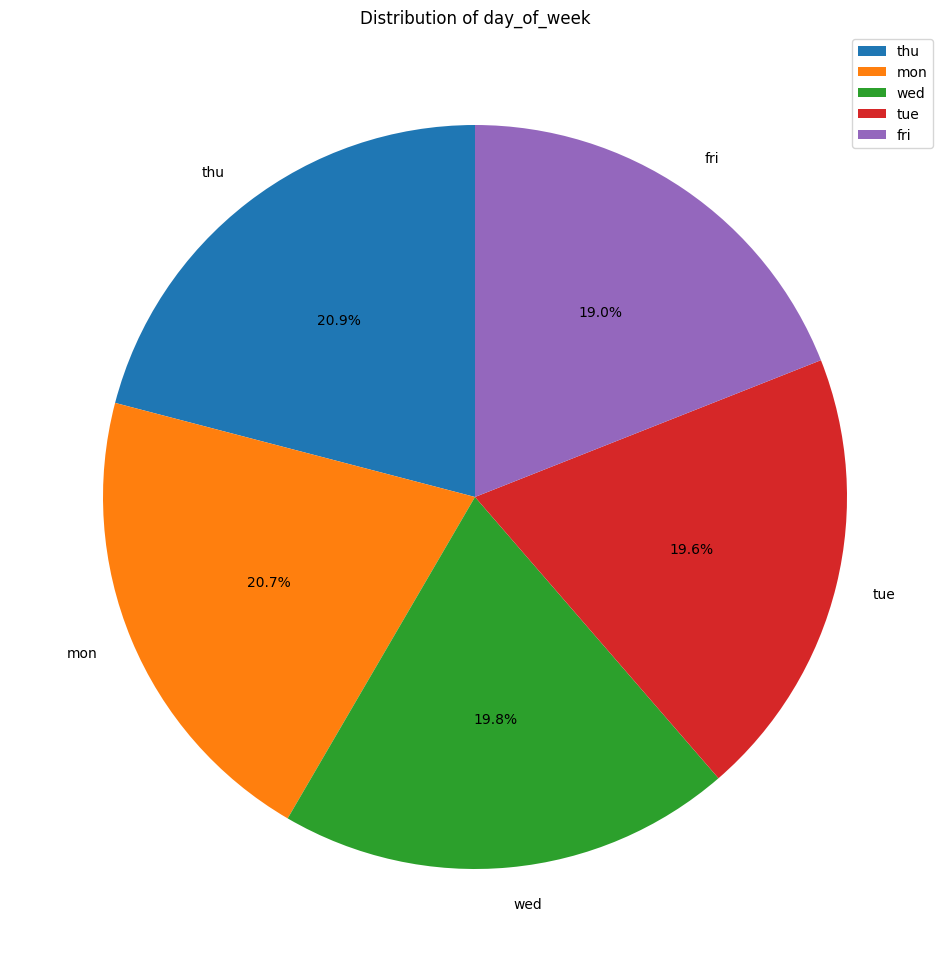

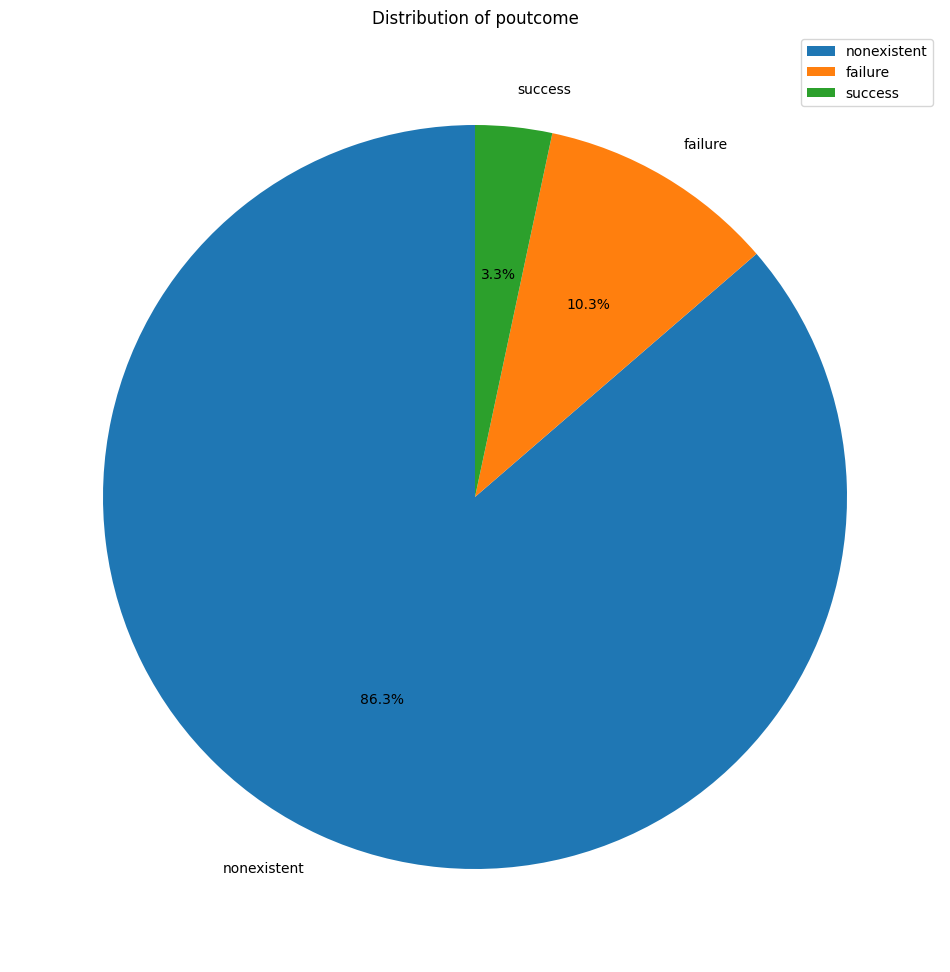

In [134]:
for col in cat_cols:
   counts = df[col].value_counts()

   plt.figure(figsize=(12,17))
   plt.pie(counts,labels= counts.index, autopct='%1.1f%%',startangle=90)
   plt.title(f'Distribution of {col}')
   plt.legend()
   plt.show()

In [135]:
print(df.groupby('job')['deposit'].mean())

job
admin.           0.129128
blue-collar      0.068951
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252619
self-employed    0.104856
services         0.081422
student          0.314286
technician       0.108325
unemployed       0.142012
Name: deposit, dtype: float64


High Success Rates: Student (0.314) and Retired (0.252) show the highest success rates and are strong target audiences.

Above Average: Admin (0.130) and Unemployed (0.142) are slightly above average and could be worth targeting.

Low Success Rates: Blue-collar (0.069) and Services (0.081) have the lowest success rates, suggesting limited potential.

Targeting Strategy: Focus on students and retired individuals.



In [136]:
df['default'].value_counts()

,count
default,
no,32577
unknown,8596
yes,3


In [137]:
#group by unknown and yes
df['default'] = df['default'].where(~df['default'].isin(['unknown']), 'yes')

In [138]:
df['default'].value_counts()

,count
default,
no,32577
yes,8599


**Encoding Categorical column**

In [139]:
df['education'].value_counts()

,count
education,
university.degree,13894
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
illiterate,18


In [140]:
# ordinal encoding for Education it specifies order
education_order=['unknown','illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']

ord_enc = OrdinalEncoder(categories=[education_order])
df['education']= ord_enc.fit_transform(df[['education']])

In [141]:
df['education']

,education
0,2.0
1,5.0
2,5.0
3,3.0
4,5.0
...,...
41183,6.0
41184,6.0
41185,7.0
41186,6.0


In [142]:
# ;labe; encoding
label_enc= ['job','marital','default','housing','loan','contact','month', 'day_of_week', 'poutcome']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in label_enc:
    df[col]=le.fit_transform(df[col])

In [143]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,deposit,campaign_log,previous_log,pdays_transform
0,56.0,3,1,2.0,0,0,0,1,6,1,...,0,1,1.1,93.994,-36.4,5191.0,0,0.693147,0.0,0
1,57.0,7,1,5.0,1,0,0,1,6,1,...,0,1,1.1,93.994,-36.4,5191.0,0,0.693147,0.0,0


**Balance Data**

In [144]:
df['deposit'].value_counts()

,count
deposit,
0,36537
1,4639


In [145]:
x= df.drop(['deposit','duration','pdays'],axis=1)
y=df['deposit']
print(x)

        age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1        2.0        0        0     0        1      6   
1      57.0    7        1        5.0        1        0     0        1      6   
2      37.0    7        1        5.0        0        1     0        1      6   
3      40.0    0        1        3.0        0        0     0        1      6   
4      56.0    7        1        5.0        0        0     1        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183  69.5    5        1        6.0        0        1     0        0      7   
41184  46.0    1        1        6.0        0        0     0        0      7   
41185  56.0    5        1        7.0        0        1     0        0      7   
41186  44.0    9        1        6.0        0        0     0        0      7   
41187  69.5    5        1        6.0        0        1     0        0      7   

       day_of_week  campaign  previous 

In [146]:
y.isna().sum() # while doing SMOTE its shows error y contain Nan values. so checking y has Nan

np.int64(0)

In [147]:
df = pd.concat([x,y],axis=1)
df= df.dropna()
x=df.drop('deposit',axis=1)
y=df['deposit']

**Performing SMOTE to correct the imbalanced class**

In [148]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)
y.value_counts()

,count
deposit,
0,36537
1,36537


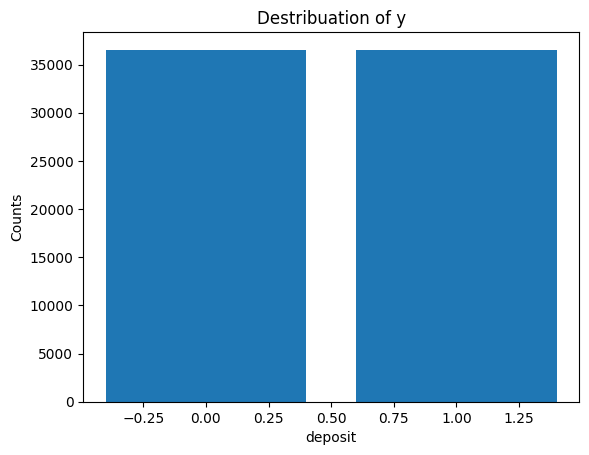

In [149]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of y')
plt.xlabel('deposit')
plt.ylabel('Counts')
plt.show()

**Scaling Data**

In [150]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x = sc.fit_transform(x)

In [151]:
x

array([[ 1.38972606, -0.18557648, -0.20540583, ..., -0.85444012,
        -0.5241812 , -0.26686132],
       [ 1.47766186,  0.93975571, -0.20540583, ..., -0.85444012,
        -0.5241812 , -0.26686132],
       [-0.28105422,  0.93975571, -0.20540583, ..., -0.85444012,
        -0.5241812 , -0.26686132],
       ...,
       [-0.89660485, -0.74824257, -1.83619958, ..., -0.85444012,
         1.34594732, -0.26686132],
       [-1.15207222, -1.02957562,  1.42538792, ...,  0.07013779,
        -0.5241812 , -0.26686132],
       [ 2.32661618,  0.37708962, -0.20540583, ..., -0.85444012,
         0.17379325, -0.26686132]])

In [152]:
y

,deposit
0,0
1,0
2,0
3,0
4,0
...,...
73069,1
73070,1
73071,1
73072,1


**Spliting Data into Train and Test**

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) # stratify keeps same class ratio in train & test

**Task 2 - Predictive modeling**

**Modeling data using 4 different algorithm**

In [154]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier()
          }

**Evaluate** **Model Performance**

---Logistic Regression---
Accuracy : 0.7900
Precsion: 0.7979
F1 Score:0.7872
Recall : 0.7768
confusion Matrix:
[[5870 1438]
 [1631 5676]]
ROC AUC: 0.7900
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      7308
           1       0.80      0.78      0.79      7307

    accuracy                           0.79     14615
   macro avg       0.79      0.79      0.79     14615
weighted avg       0.79      0.79      0.79     14615


---Decision Tree---
Accuracy : 0.8946
Precsion: 0.8877
F1 Score:0.8956
Recall : 0.9035
confusion Matrix:
[[6473  835]
 [ 705 6602]]
ROC AUC: 0.8946
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7308
           1       0.89      0.90      0.90      7307

    accuracy                           0.89     14615
   macro avg       0.89      0.89      0.89     14615
weighted avg       0.89      0.89      0.89     14615


---Random Forest---
Accuracy : 0.9296
Prec

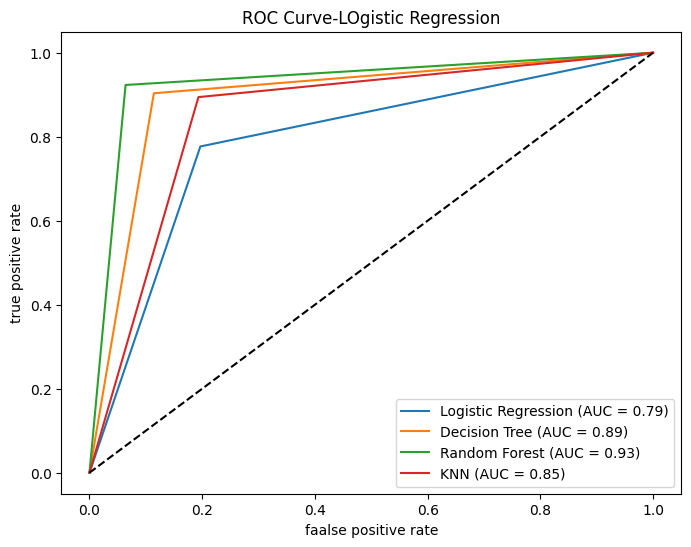

In [155]:


results={}
plt.figure(figsize=(8,6))
for name, model in models.items():
     # Train model
     model.fit(x_train,y_train)

     #Prediction
     y_pred = model.predict(x_test)

     #Probability for ROC
     if hasattr(model, "Predict_proba"):
         y_prob =model.predict_proba(x_test)[:,1]
     else:
         y_prob =model.predict(x_test)

     #metrics
     f1 = f1_score(y_test,y_pred)
     recall =recall_score(y_test,y_pred)
     cm = confusion_matrix(y_test,y_pred)
     roc_auc = roc_auc_score(y_test,y_pred)
     pre = precision_score(y_test,y_pred)


    #accuracy
     acc = accuracy_score(y_test,y_pred)
     results[name] =acc

     print(f"---{name}---")
     print(f"Accuracy : {acc:.4f}")
     print(f"Precsion: {pre:.4f}")
     print(f"F1 Score:{f1:.4f}")
     print(f"Recall : {recall:.4f}")
     print("confusion Matrix:")
     print(cm)
     print(f"ROC AUC: {roc_auc:.4f}")
     print(classification_report(y_test,y_pred))
     print(f"{'='*30}\n")

    #Roc Curve
     fpr,tpr,_= roc_curve(y_test,y_prob)
     plt.plot(fpr,tpr,label= f'{name} (AUC = {roc_auc:.2f})')

#final ROC Plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel('faalse positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve-LOgistic Regression')
plt.legend()
plt.show()


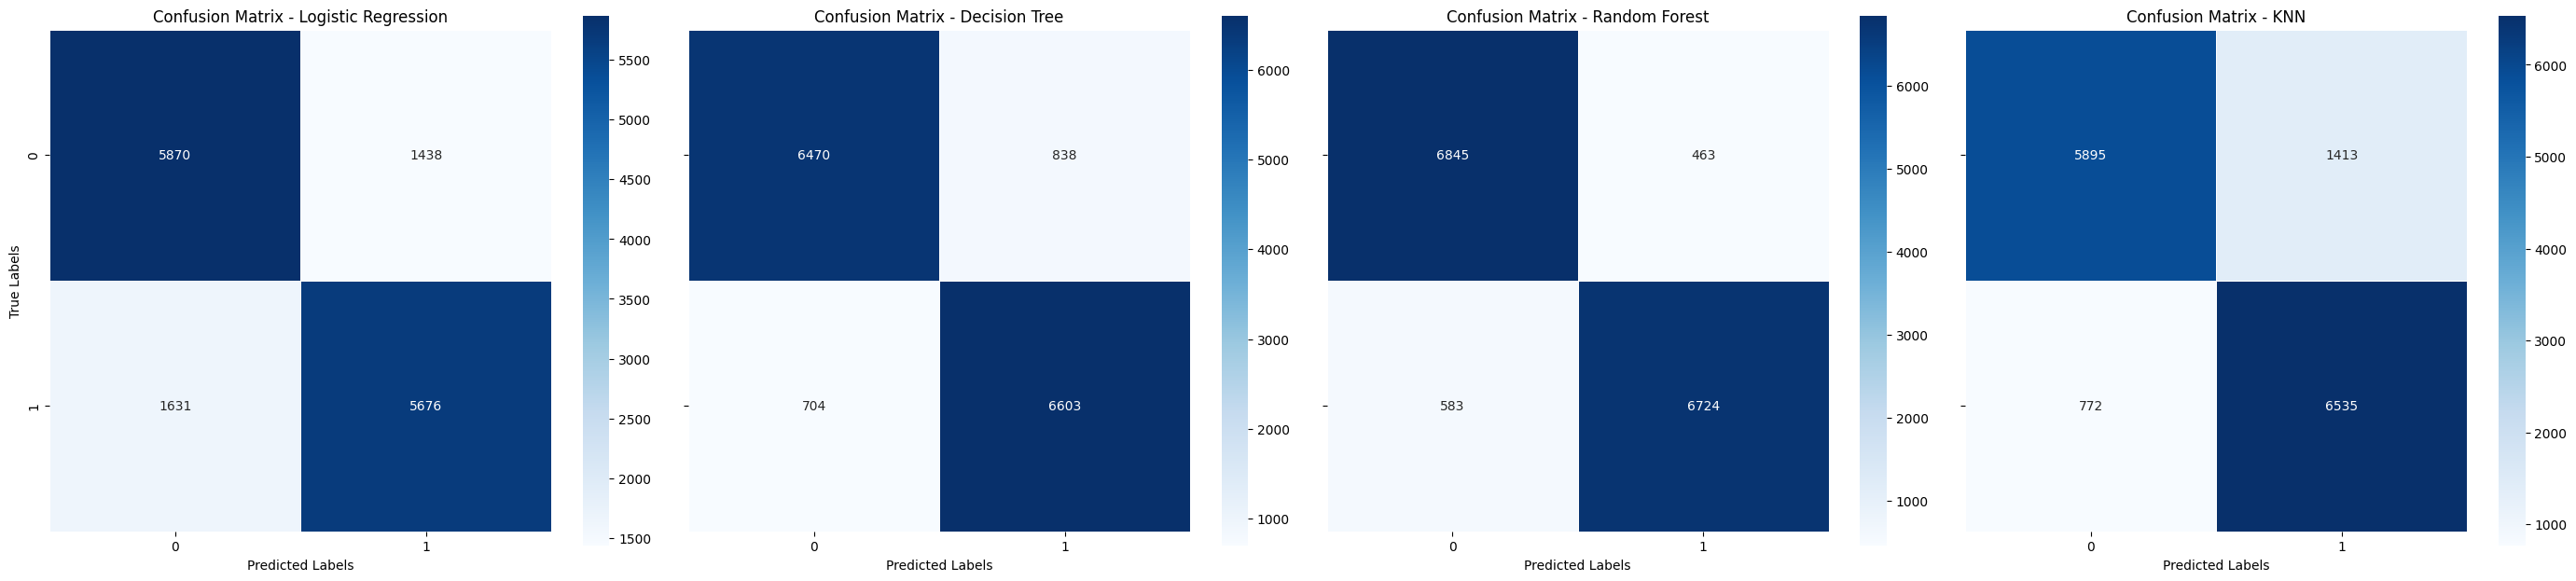

In [156]:
# 4. Loop through algorithms, train, predict, and plot the heatmap
num_algorithms = len(models)
fig, axes = plt.subplots(1, num_algorithms, figsize=(28,6), sharey=True)

for i, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(x_train,y_train)

     #Prediction
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    # Plot heatmap on the corresponding axis
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True,
                ax=axes[i], xticklabels=['0', '1'], yticklabels=['0', '1'])

    # Add labels and title
    axes[i].set_xlabel('Predicted Labels')
    if i == 0: # Only add y-label to the first plot to avoid redundancy with sharey=True
        axes[i].set_ylabel('True Labels')
    axes[i].set_title(f'Confusion Matrix - {name}')

# 5. Display the plots
plt.tight_layout() # Adjust subplot params so that the subplot(s) fits in to the figure area.
plt.show()

**Hyperparameter Tuning Applying to Different Algorithm**

**Logistic REgression**

In [157]:
logistic_regression_hyperparameters  = [
    {'C': 0.1, 'solver': 'liblinear', 'max_iter': 100},
    {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 200},
    {'C': 10.0, 'solver': 'saga', 'max_iter': 300},
    {'C': 1.0, 'solver': 'newton-cg', 'max_iter': 100}
]

In [158]:
final_accuracies = []
best_lr_accuracy = 0
best_lr_params = None
y_pred_LRf= None

for params in logistic_regression_hyperparameters:
    LR = LogisticRegression(**params, random_state=42)
    LR.fit(x_train, y_train)
    y_pred_LR = LR.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_LR)
    if accuracy > best_lr_accuracy:
        best_lr_accuracy = accuracy
        best_lr_params = params
        y_pred_LRf=y_pred_LR
    final_accuracies.append((params, accuracy))

In [159]:
# Initialize the dictionary
best_results = {}

best_results['LR'] = { 'best_params': best_lr_params, 'accuracy': best_lr_accuracy }

In [160]:
for params, accuracy in final_accuracies:
    print(f"Logistic regression Hyperparameters: {params} - Accuracy: {accuracy}")

Logistic regression Hyperparameters: {'C': 0.1, 'solver': 'liblinear', 'max_iter': 100} - Accuracy: 0.7899418405747519
Logistic regression Hyperparameters: {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 200} - Accuracy: 0.790010263427985
Logistic regression Hyperparameters: {'C': 10.0, 'solver': 'saga', 'max_iter': 300} - Accuracy: 0.7899418405747519
Logistic regression Hyperparameters: {'C': 1.0, 'solver': 'newton-cg', 'max_iter': 100} - Accuracy: 0.7899418405747519


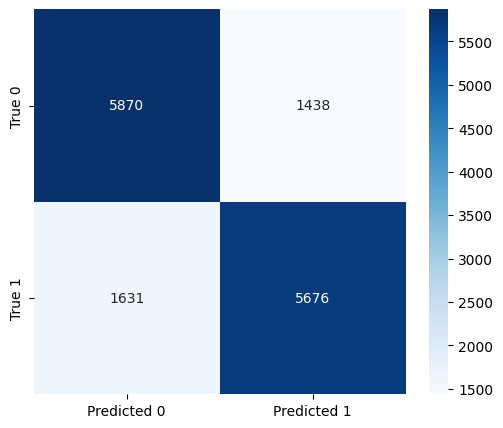

In [161]:
conf_matrix = confusion_matrix(y_test, y_pred_LRf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.show()

No changes after hyper parameter tuning same like before

**Decision Tree**

In [162]:
# Define different hyperparameters of Decision tree
decision_tree_hyperparameters  = [
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'entropy'},
    {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
]

In [163]:
final_accuracies = []
best_dt_accuracy = 0
best_dt_params = None
y_pred_dtf= None
for params in decision_tree_hyperparameters:
    dt = DecisionTreeClassifier(random_state=42, **params)
    dt.fit(x_train, y_train)
    y_pred_dt = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_dt)
    if accuracy > best_dt_accuracy:
        best_dt_accuracy = accuracy
        best_dt_params = params
        y_pred_dtf=y_pred_dt
    final_accuracies.append((params, accuracy))

In [164]:
best_results['Decision Tree'] = {
    'best_params': best_dt_params,
    'accuracy': best_dt_accuracy
}
for params, accuracy in final_accuracies:
    print(f"Decision tree Hyperparameters: {params} - Accuracy: {accuracy}"
    )

Decision tree Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'} - Accuracy: 0.7605200136845707
Decision tree Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'entropy'} - Accuracy: 0.8158056790968183
Decision tree Hyperparameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'} - Accuracy: 0.783099555251454
Decision tree Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'} - Accuracy: 0.8956551488197058


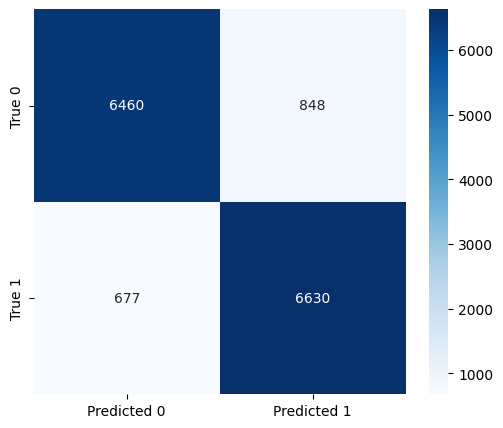

In [165]:
conf_matrix = confusion_matrix(y_test, y_pred_dtf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.show()

**Random Forest**

In [166]:
# Define different hyperparameters of Random Forest
random_forest_hyperparameters  = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini'},
    {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}
]

In [167]:
final_accuracies = []
best_rf_accuracy = 0
best_rf_params = None
y_pred_rff= None
for params in random_forest_hyperparameters:
    RF = RandomForestClassifier(random_state=42, **params)
    RF.fit(x_train, y_train)
    y_pred_rf = RF.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    if accuracy > best_rf_accuracy:
        best_rf_accuracy = accuracy
        best_rf_params = params
        y_pred_rff=y_pred_rf
    final_accuracies.append((params, accuracy))

In [168]:
best_results['Random Forest'] = {
    'best_params': best_rf_params,
    'accuracy': best_rf_accuracy
}

In [169]:
for params, accuracy in final_accuracies:
    print(f"Hyperparameters: {params} - Accuracy: {accuracy}")

Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'} - Accuracy: 0.8452959288402326
Hyperparameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy'} - Accuracy: 0.9134450906602806
Hyperparameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini'} - Accuracy: 0.9112555593568252
Hyperparameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'} - Accuracy: 0.8867601778994184


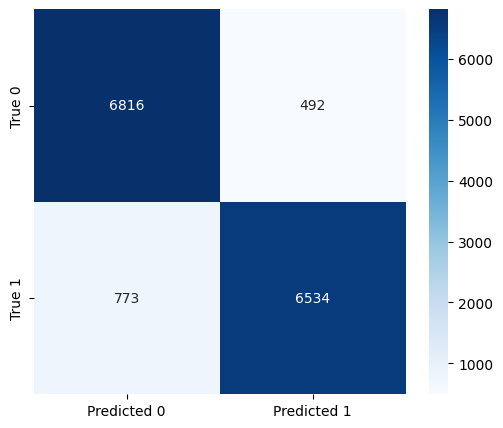

In [170]:
conf_matrix = confusion_matrix(y_test, y_pred_rff)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.show()

In [171]:
df_best_results = pd.DataFrame.from_dict(best_results, orient='index')
df_best_results.head()

,best_params,accuracy
LR,"{'C': 1.0, 'solver': 'lbfgs', 'max_iter': 200}",0.790010
Decision Tree,"{'max_depth': None, 'min_samples_split': 2, 'm...",0.895655
Random Forest,"{'n_estimators': 150, 'max_depth': 20, 'min_sa...",0.913445


Actually tuning Reduced the model performance especially tree based mdoel so i go without tuning.

**Task 3 **
Marketing Strategy Recommendations

Based on the model and EDA:

• Customers with longer call duration have higher subscription probability
• Clients with fewer previous contacts are more responsive
• Certain job categories (e.g., management, retired) have higher conversion
• Economic indicators strongly influence success

**Challenges and Solutions**

1. Class Imbalance
The target variable was highly skewed..

2. Highly Correlated Variables

3. Encoding Impact
Different encoding methods produced large performance differences.

4. Hyperparameter Tuning Issues
In some cases tuning reduced performance.
This showed preprocessing was more important than tuning.

**Conclusion**

Random Forest provided the best balance between recall and precision, making it suitable for production deployment.

This project demonstrates that preprocessing, feature engineering and correct evaluation metrics are more important than blindly tuning models.
The final model can help banks reduce marketing cost and increase subscription success.